# Leak Detection Model using Self Organizing Maps

In [0]:
pip install susi

  Created wheel for susi: filename=susi-1.0.10-cp36-none-any.whl size=22960 sha256=35506e32bf44ae437f45a0c4a1557a1449ce6c8286c59b82d43043ebd462d55c
  Stored in directory: /root/.cache/pip/wheels/9d/24/83/9f66f917ca36b8adb5b5848ff85d623e7288c3ca9734e24518
Successfully built susi


In [0]:
#Required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import susi
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Reading Dataset

In [0]:
#reading the leakage data
df_leak=pd.read_csv('/content/drive/My Drive/leak_values_random.csv',header=None)
#data shape
print("Leak Data shape",df_leak.shape)
# reading the pressure data
df_pressure=pd.read_csv('/content/drive/My Drive/pressure_response_random.csv',header=None)
# Data Shape
print("Pressure Data shape",df_pressure.shape)

Leak Data shape (10000, 16)
Pressure Data shape (10000, 16)


In [0]:
#Reviewing dataset
print("Pressure Values: ")
print(df_pressure.head())
print("Leak Values: ")
print(df_leak.head())

Pressure Values: 
         0         1         2   ...        13        14        15
0  0.027035  0.051872  0.067543  ...  0.101807  0.091793  0.056034
1  0.045982  0.089344  0.117271  ...  0.070751  0.064766  0.091915
2  0.011093  0.016731  0.020470  ...  0.207073  0.144440  0.028271
3  0.122879  0.233437  0.317451  ...  0.200520  0.182701  0.213291
4  0.023178  0.033390  0.038452  ...  0.144451  0.152092  0.045437

[5 rows x 16 columns]
Leak Values: 
   0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15
0   0   2   0   0   0   0   0   3   0   0   0   0   4   0   0   0
1   0   4   0   0   0   0   0   0   0   8   0   0   0   0   0   0
2   0   0   0   0   0   0   0   0   0   0   0   0   0   7   0   0
3   0   8   0   0   0   6   0   3  10   0   0   5   0   0   0   0
4   0   0   0   0   0   3   0   0   0   0   0   0   0   0   7   0


In [0]:
#Changing pandas dataframe to numpy array
X = df_pressure.values
y = df_leak.values
#print(X[1])

In [0]:
#Spliiting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,shuffle = False, shuffle = True)

In [0]:
#Data preprocessing
Ytrain_maxarg_list=[]
Ytest_maxarg_list = []

for i in y_train:
    val1=np.argmax(i)
    Ytrain_maxarg_list.append(val1+1)
for j in y_test:
    val2=np.argmax(j)
    Ytest_maxarg_list.append(val2+1)
# print(X_train[1])
# print(y_train[1])
# print(Ytrain_maxarg_list[1])
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
X_train_normalized = normalize(X_train)
X_test_normalized = normalize(X_test)
print(X_train_normalized)
print(X_test_normalized)

[[0.09442781 0.18118094 0.23591629 ... 0.35559325 0.32061752 0.19571752]
 [0.14175519 0.27543126 0.36152631 ... 0.21811296 0.1996615  0.28335751]
 [0.03372407 0.05086443 0.06222949 ... 0.62951982 0.43910871 0.08594535]
 ...
 [0.16526219 0.20401198 0.21685461 ... 0.29898642 0.27352306 0.23718646]
 [0.37167271 0.18355912 0.19989082 ... 0.32655735 0.25067244 0.21987223]
 [0.110403   0.26246178 0.36090952 ... 0.46109069 0.33901835 0.17336023]]
[[0.71054018 0.08841924 0.0904878  ... 0.14890186 0.1109121  0.07358667]
 [0.75043763 0.06216539 0.06954652 ... 0.02571442 0.02353496 0.05258128]
 [0.15933356 0.32589289 0.36407312 ... 0.22920746 0.20899136 0.25703897]
 ...
 [0.13302151 0.18937564 0.21823162 ... 0.30373658 0.27917912 0.25926934]
 [0.19380022 0.10377199 0.1168812  ... 0.49967028 0.38575957 0.12358224]
 [0.18794029 0.32477254 0.28894091 ... 0.33999532 0.32165649 0.16938696]]


In [0]:
#Training the SOM Model for classification task.
#The following performs hyperparameter tuning on the Supervised SOM Model.
#Each hyperparameter has a certain range of values it is experimented with.
rows = [25,50,75,100,125,150,200]
count_1 = 0
columns = [25,50,75,100,125,150,200]
iter_superviseds = [3000, 5000, 7000, 9000, 10000, 12000, 15000,20000]
iter_unsuperviseds = [3000, 5000, 7000, 9000, 10000, 12000, 15000,20000]
learning_rates = [0.7,0.8,0.9,1]
max_accuracy = 0
scores = {}
for row in rows:
    for col in columns:
        for iter_supervised in iter_superviseds:
            for iter_unsupervised in iter_unsuperviseds:
                for st_rate in learning_rates:
                    for end_rate in learning_rates:
                        if row == 125 and col == 125:
                        som = susi.SOMClassifier(
                            n_rows= row,
                            n_columns= col,
                            n_iter_supervised= iter_supervised,
                            n_iter_unsupervised= iter_unsupervised,
                            learning_rate_start= st_rate,
                            learning_rate_end= end_rate,
                            do_class_weighting = False)
                        som.fit(X_train_normalized, np.array(Ytrain_maxarg_list))
                        y_pred = som.predict(X_test_normalized)
                        count = 0
                        #Observing the actual and predicted values and calculating the accuracy 
                        #based on number of classes predicted correctly
                        for i,j in zip(y_pred,Ytest_maxarg_list):
                            if i == j:
                                count += 1
                        st = ' row: '+str(row)+' col: '+str(col)+' itersupervised: '+str(iter_supervised)+' iterunsupervised: '+str(iter_unsupervised)+' s_rate:'+str(st_rate)+' e_rate: '+str(end_rate)
                        scores[st] = count/len(y_pred)
#                         accuracy = count/len(y_pred)
#                         if max_accuracy < accuracy:
#                           max_accuracy = accuracy
#                           max_st = st
#                         print("For configuration: ",max_st)
#                         print(" Max Accuracy: ", max_accuracy)
#                         print("Count: ",count_1)
#                         count_1 += 1



In [0]:
#  # print(sorted(scores.values()))
# # for key,values in scores.items():
# #     if values == 0.705:
# #         print(key)
# for i,j in scores.items():
#   pr
# Ytest_maxarg_list
# count = 0
# for i,j in zip(y_pred,Ytest_maxarg_list):
#     if i == j:
#         count += 1
# print("Accuracy: ",count/len(y_pred))
# from sklearn.metrics import precision_score
# precision_score(Ytest_maxarg_list, y_pred, average='macro')

In [0]:
y_pred

array([16,  9, 16, 12,  2, 15,  2,  1,  6, 14,  1,  4, 10,  7, 16, 11,  2,
       13, 16, 12,  5, 16, 14, 16, 13,  7, 11, 15, 16, 16,  7, 12, 13,  8,
       15,  2, 16,  2, 11,  2,  3,  1, 10, 13, 12,  5,  9, 11, 15, 13, 14,
        4, 15, 15, 15, 14,  2, 14, 11,  5,  9, 16, 12, 11,  1, 15, 15,  8,
        7,  2, 11, 11, 16, 13, 12, 15, 14, 12,  9,  4, 13, 10, 12,  8, 16,
        1,  4,  5, 13, 15, 13, 13, 12, 16, 15, 10, 13, 13,  2, 16, 15,  4,
       12, 13, 16, 16, 16, 11,  5, 16,  7,  9,  8,  3, 14, 13, 10,  2, 10,
       14, 16, 14,  5,  7,  8, 16, 16,  6, 14, 15, 10, 14, 10, 14,  8, 16,
       13, 13,  5, 16, 16, 16,  2, 16, 12,  7, 11, 10,  4, 15, 14, 13,  9,
       16,  7, 16, 12, 13,  7, 12,  2,  5, 16, 16, 12, 13,  9,  5, 12, 13,
       10,  9, 16, 16, 16, 15,  8, 10,  9, 15, 16, 12, 14,  9, 14, 13,  8,
       16, 12, 14, 11,  2, 15,  8,  8, 11,  8,  7, 13, 15])

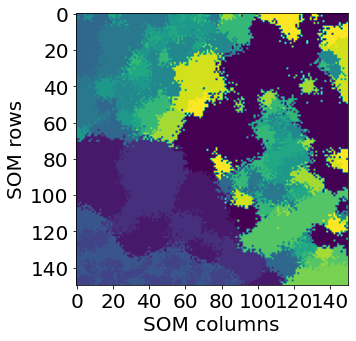

In [0]:
#Ploting estimation map for the SOM Model
def plot_estimation_map(estimation_map, fontsize=20):
    plt.figure(figsize=(7,5))
    plt.imshow(estimation_map, cmap="viridis_r")
    plt.xlabel("SOM columns", fontsize=fontsize)
    plt.ylabel("SOM rows", fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.grid(b=False)

estimation_map = som.get_estimation_map().squeeze()
plot_estimation_map(estimation_map)

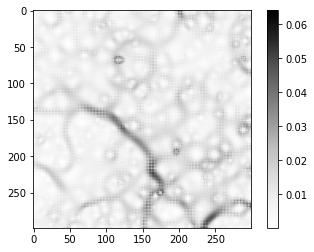

In [0]:
#Plotting the U-Matrix for the SOM Model
u_matrix = som.get_u_matrix()
plt.imshow(np.squeeze(u_matrix), cmap="Greys")
plt.colorbar()
plt.show()

Text(0, 0.5, 'Accuracy')

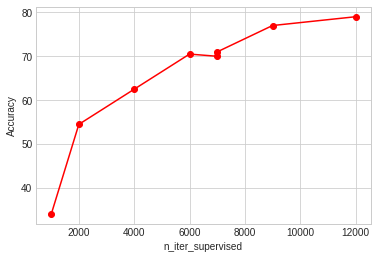

In [0]:
#Plotting the model accuracy graph based on results given by the SOM Model.
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
x = [1000,2000,4000,6000,7000,7000,9000,12000]
y = [34,54.5,62.5,70.5,70,71,77,79,]
plt.plot(x, y, '-ok',color = "red")
plt.xlabel("n_iter_supervised")
plt.ylabel("Accuracy")

In [0]:
# Experimeting with Supervised SOM for regression based classification.
som = susi.SOMRegressor(
    n_rows=200,
    n_columns=200,
    n_iter_unsupervised=2500,
    n_iter_supervised=2500,
    neighborhood_mode_unsupervised="linear",
    neighborhood_mode_supervised="linear",
    learn_mode_unsupervised="min",
    learn_mode_supervised="min",
    learning_rate_start=0.5,
    learning_rate_end=1,
    # do_class_weighting=True,
    random_state=None,
    n_jobs=1)

In [0]:
som.fit(X_train, np.array(Ytrain_maxarg_list))

SOMRegressor(distance_metric='euclidean', init_mode_supervised='random',
             init_mode_unsupervised='random', learn_mode_supervised='min',
             learn_mode_unsupervised='min', learning_rate_end=0.5,
             learning_rate_start=0.5, missing_label_placeholder=None,
             n_columns=100, n_iter_supervised=2500, n_iter_unsupervised=2500,
             n_jobs=1, n_rows=100, nbh_dist_weight_mode='pseudo-gaussian',
             neighborhood_mode_supervised='linear',
             neighborhood_mode_unsupervised='linear', random_state=None,
             train_mode_supervised='online', train_mode_unsupervised='online',
             verbose=0)

In [0]:
#Train and test predictions
y_pred = som.predict(X_test)
y_pred_train = som.predict(X_train)

In [0]:
#Calculating the r2 score the regressed model
print("Train: {0:.1f} %".format(r2_score(Ytrain_maxarg_list, y_pred_train)*100))
print("Test: {0:.1f} %".format(r2_score(Ytest_maxarg_list, y_pred)*100))

Train: 69.9 %
Test: 70.6 %


In [0]:
y_pred_train

array([8.15651081, 2.65289659, 6.75513064, ..., 5.46762946, 3.97773729,
       6.62757811])

In [0]:
y_train[7]

array([0, 0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 0])